In [18]:
# Só deve descomentar 1 opção
#origemImagens = 'originais'
origemImagens = 'originaisLimpas'
#origemImagens = 'aumentoDeDados'
#origemImagens = 'aumentoDeDadosLimpas'

In [19]:
shapeImg = (32, 32, 3)
quantidadeDeCanais = shapeImg[2]

In [20]:
dicionarioNomesArquivos = {
    'originais': ('dataset.csv', 'labels.csv'),
    'originaisLimpas': ('datasetLimpo.csv', 'labelsLimpo.csv'),
    'aumentoDeDados': ('datasetExpandido.csv', 'labelsExpandido.csv'),
    'aumentoDeDadosLimpas': ('datasetExpandidoLimpo.csv', 'labelsExpandidoLimpo.csv'),
}
(nomeArquivoDataset, nomeArquivoLabels) = dicionarioNomesArquivos[origemImagens]

In [31]:
basePathToData = '/content/drive/MyDrive/2021.2/TCC/Testes/Data/'
pastaDatasetInput = 'DatasetMultiprovaAvulso/'
pastaDatasetOutput = 'DatasetMultiprova/'
tipoDatasetOutput = 'LetrasVF'
pathToExportDF = basePathToData + pastaDatasetOutput + tipoDatasetOutput + '/' + nomeArquivoDataset
pathToExportLabels = basePathToData + pastaDatasetOutput + tipoDatasetOutput + '/' + nomeArquivoLabels

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from collections import Counter
import random
import cv2

In [33]:
def countSamplesByClass(df):
  lettersCount = Counter(df)
  plt.figure(figsize=(10,10))
  plt.barh(list(lettersCount.keys()), list(lettersCount.values()))
  plt.title('Quantidade de amostras por letras')
  plt.xlabel('Quantidade de amostras')
  plt.ylabel('Letras')
  plt.show()

In [34]:
def getPathByLetter(classType):
  basePath = basePathToData + pastaDatasetInput + classType + '/'
  datasetPath = basePath + nomeArquivoDataset
  labelsPath = basePath + nomeArquivoLabels
  return (datasetPath, labelsPath)

In [35]:
def getDatasetByLetter(letters):
  dataframes = []
  labels = []
  for letter in letters:
    (datasetPath, labelsPath) = getPathByLetter(letter)
    dataframes.append(pd.read_csv(datasetPath).astype('float32'))
    labels.append(pd.read_csv(labelsPath, squeeze=True).astype('string'))
  resultDF = pd.concat(dataframes)
  resultLabels = pd.concat(labels)
  return (resultDF, resultLabels)

In [36]:
classes = ['F', 'V', '10']
print(classes)

['F', 'V', '10']


In [37]:
(dataframe, labels) = getDatasetByLetter(classes)

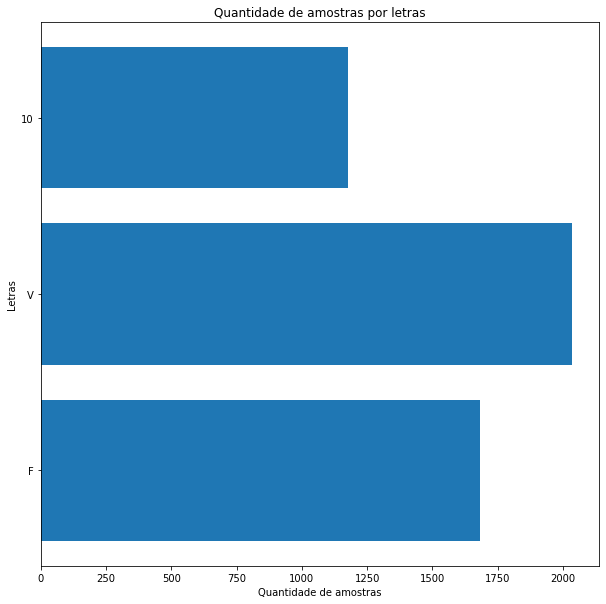

In [38]:
countSamplesByClass(labels)

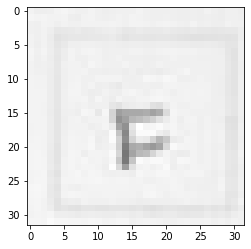

Index: 1098 , Label: F


In [41]:
# Checar se imagem corresponde a label correta
randomIndex = random.randint(0, len(labels))
testImg = dataframe.iloc[randomIndex]
testImg = np.array(testImg).reshape(shapeImg[0], shapeImg[1], quantidadeDeCanais)
plt.imshow(testImg, cmap="gray")
plt.show()
print('Index:', randomIndex, ', Label:', labels.iloc[randomIndex])

In [42]:
# Salvar dataframe e labels completo
dataframe.to_csv(path_or_buf=pathToExportDF, index=False)
labels.to_csv(path_or_buf=pathToExportLabels, index=False)